# Sampling in Python

[![View On GitHub](github.svg)](https://github.com/datttrian/sampling-in-python)

## Introduction to Sampling

### Simple sampling with pandas

Throughout this chapter, you'll be exploring song data from Spotify.
Each row of this population dataset represents a song, and there are
over 40,000 rows. Columns include the song name, the artists who
performed it, the release year, and attributes of the song like its
duration, tempo, and danceability. You'll start by looking at the
durations.

Your first task is to sample the Spotify dataset and compare the mean
duration of the population with the sample.

`spotify_population` is available and `pandas` is loaded as `pd`.

**Instructions**

- Sample 1000 rows from `spotify_population`, assigning to
  `spotify_sample`.
- Calculate the mean duration in minutes from `spotify_population` using `pandas`.
- Calculate the mean duration in minutes from `spotify_sample` using `pandas`.

**Answer**

In [ ]:
pip install pandas pyarrow

In [2]:
# added/edited
import pandas as pd
spotify_population = pd.read_feather("spotify_2000_2020.feather")

In [3]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

       acousticness                                            artists  \
14634        0.2480                 ['Lenny Tavárez', 'Justin Quiles']   
24221        0.0744                           ['Florida Georgia Line']   
312          0.2190                                      ['Nicky Jam']   
40883        0.8380                                     ['King Krule']   
21085        0.4160                        ['Aventura', 'Judy Santos']   
...             ...                                                ...   
5745         0.1560                                   ['Jason Isbell']   
13711        0.9650  ['Marcus Gilmore', 'Danny Grissett', 'Vicente ...   
11769        0.0305                               ['Pitbull', 'Kesha']   
38232        0.4790                                ['Aretha Franklin']   
25450        0.0515                                  ['Darryl Worley']   

       danceability  duration_ms  duration_minutes  energy  explicit  \
14634         0.777     154286.0       

### Simple sampling and calculating with NumPy

You can also use `numpy` to calculate parameters or statistics from a
list or `pandas` Series.

You'll be turning it up to eleven and looking at the `loudness` property
of each song.

`spotify_population` is available and `numpy` is loaded as `np`.

**Instructions**

- Create a `pandas` Series, `loudness_pop`, by subsetting the `loudness`
  column from `spotify_population`.
- Sample `loudness_pop` to get 100 random values, assigning to
  `loudness_samp`.
- Calculate the mean of `loudness_pop` using `numpy`.
- Calculate the mean of `loudness_samp` using `numpy`.

**Answer**


In [4]:
# added/edited
import numpy as np

In [5]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

print(loudness_samp)


# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

print(mean_loudness_pop)
print(mean_loudness_samp)

5860     -4.118
2821     -4.757
24252    -7.327
32814    -5.148
11347    -6.487
          ...  
29380    -5.066
2883    -24.789
26014    -2.403
9116    -13.325
35617    -6.839
Name: loudness, Length: 100, dtype: float64
-7.366856851353947
-7.433510000000002


### Are findings from the sample generalizable?

You just saw how convenience sampling—collecting data using the easiest
method—can result in samples that aren't representative of the
population. Equivalently, this means findings from the sample are not
generalizable to the population. Visualizing the distributions of the
population and the sample can help determine whether or not the sample
is representative of the population.

The Spotify dataset contains an `acousticness` column, which is a
confidence measure from zero to one of whether the track was made with
instruments that aren't plugged in. You'll compare the `acousticness`
distribution of the total population of songs with a sample of those
songs.

`spotify_population` and `spotify_mysterious_sample` are available;
`pandas` as `pd`, `matplotlib.pyplot` as `plt`, and `numpy` as `np` are
loaded.

**Instructions**

- Plot a histogram of the `acousticness` from `spotify_population` with
  bins of width `0.01` from `0` to `1` using pandas `.hist()`.
- Update the histogram code to use the `spotify_mysterious_sample` dataset.


**Answer**


In [ ]:
pip install matplotlib

In [7]:
# added/edited
import matplotlib.pyplot as plt
spotify_mysterious_sample = spotify_population[spotify_population['acousticness'] > 0.95]

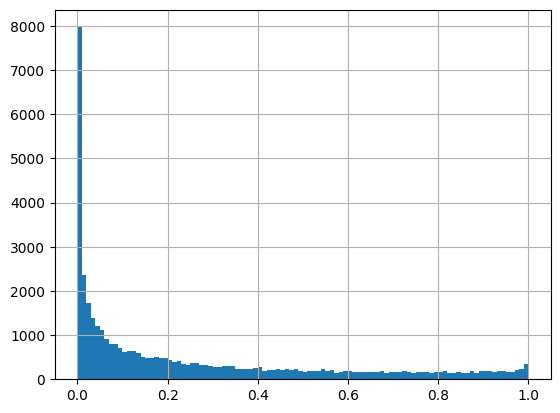

In [8]:
# Visualize the distribution of acousticness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

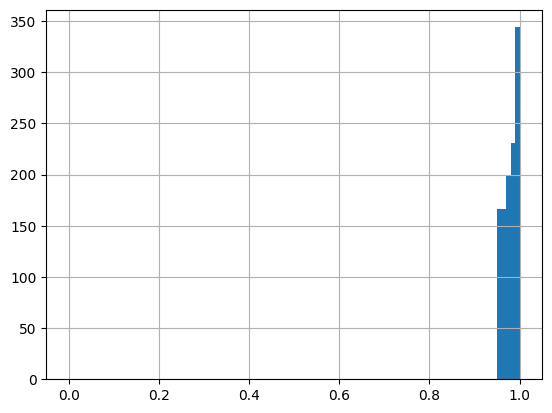

In [9]:
# Update the histogram to use spotify_mysterious_sample
spotify_mysterious_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

### Are these findings generalizable?

Let's look at another sample to see if it is representative of the
population. This time, you'll look at the `duration_minutes` column of
the Spotify dataset, which contains the length of the song in minutes.

`spotify_population` and `spotify_mysterious_sample2` are available;
`pandas`, `matplotlib.pyplot`, and `numpy` are loaded using their
standard aliases.

**Instructions**

- Plot a histogram of `duration_minutes` from `spotify_population` with
  bins of width `0.5` from `0` to `15` using pandas `.hist()`.
- Update the histogram code to use the `spotify_mysterious_sample2` dataset.


**Answer**


In [10]:
# added/edited
spotify_mysterious_sample2 = spotify_population.sample(n=50)

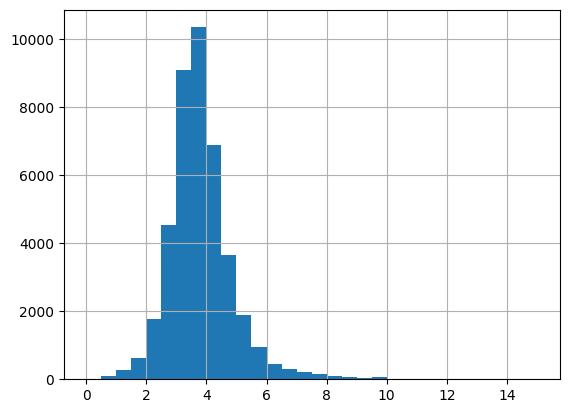

In [11]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

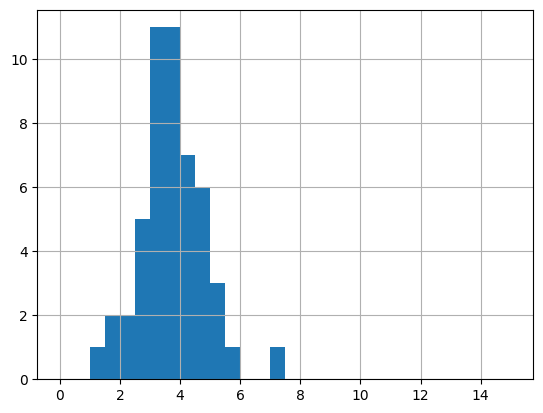

In [12]:
# Update the histogram to use spotify_mysterious_sample2
spotify_mysterious_sample2['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

### Generating random numbers

You've used `.sample()` to generate pseudo-random numbers from a set of
values in a DataFrame. A related task is to generate random numbers that
follow a statistical distribution, like the uniform distribution or the
normal distribution.

Each random number generation function has distribution-specific
arguments and an argument for specifying the number of random numbers to
generate.

`matplotlib.pyplot` is loaded as `plt`, and `numpy` is loaded as `np`.

**Instructions**

- Generate 5000 numbers from a uniform distribution, setting the
  parameters `low` to `-3` and `high` to `3`.
- Generate 5000 numbers from a normal distribution, setting the parameters `loc` to `5` and `scale` to `2`.
- Plot a histogram of `uniforms` with bins of width of `0.25` from `-3` to `3` using `plt.hist()`.
- Plot a histogram of normals with bins of width of 0.5 from -2 to 13 using plt.hist().

**Answer**


In [13]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Print uniforms
print(uniforms)


# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Print normals
print(normals)

[-1.8421194   0.64404365 -1.92788746 ... -2.57639818  1.59173031
 -0.11919233]
[6.24654043 4.44286574 2.85788322 ... 4.99755308 4.32760378 2.80415531]


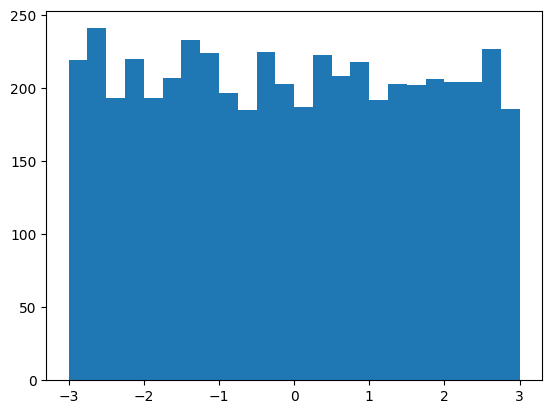

In [14]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.show()

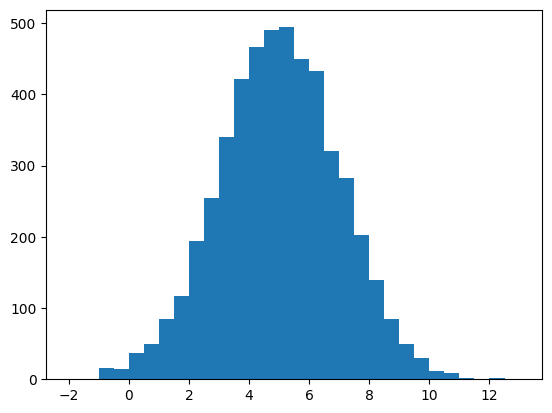

In [15]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5))
plt.show()

## Sampling Methods

### Simple random sampling

The simplest method of sampling a population is the one you've seen
already. It is known as *simple random sampling* (sometimes abbreviated
to "SRS"), and involves picking rows at random, one at a time, where
each row has the same chance of being picked as any other.

In this chapter, you'll apply sampling methods to a synthetic
(fictional) employee attrition dataset from IBM, where "attrition" in
this context means leaving the company.

`attrition_pop` is available; `pandas` as `pd` is loaded.

**Instructions**

- Sample 70 rows from `attrition_pop` using simple random sampling,
  setting the random seed to `18900217`.
- Print the sample dataset, `attrition_samp`. *What do you notice about
  the indices?*

**Answer**

In [16]:
# added/edited
attrition_pop = pd.read_feather("attrition.feather")

In [17]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
print(attrition_samp)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1134   35        0.0      Travel_Rarely        583  Research_Development   
1150   52        0.0         Non-Travel        585                 Sales   
531    33        0.0      Travel_Rarely        931  Research_Development   
395    31        0.0      Travel_Rarely       1332  Research_Development   
392    29        0.0      Travel_Rarely        942  Research_Development   
...   ...        ...                ...        ...                   ...   
361    27        0.0  Travel_Frequently       1410                 Sales   
1180   36        0.0      Travel_Rarely        530                 Sales   
230    26        0.0      Travel_Rarely       1443                 Sales   
211    29        0.0  Travel_Frequently        410  Research_Development   
890    30        0.0  Travel_Frequently       1312  Research_Development   

      DistanceFromHome      Education    EducationField  \
1134                25      

### Systematic sampling

One sampling method that avoids randomness is called *systematic
sampling*. Here, you pick rows from the population at regular intervals.

For example, if the population dataset had one thousand rows, and you
wanted a sample size of five, you could pick rows `0`, `200`, `400`,
`600`, and `800`.

`attrition_pop` is available; `pandas` has been pre-loaded as `pd`.

**Instructions**

- Set the sample size to `70`.
- Calculate the population size from `attrition_pop`.
- Calculate the interval between the rows to be sampled.
- Systematically sample `attrition_pop` to get the rows of the population at each `interval`, starting at 0; assign the rows to `attrition_sys_samp`.

**Answer**


In [18]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
print(attrition_sys_samp)

      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
21     19        0.0  Travel_Rarely       1181  Research_Development   
42     45        0.0  Travel_Rarely        252  Research_Development   
63     23        0.0  Travel_Rarely        373  Research_Development   
84     30        1.0  Travel_Rarely        945                 Sales   
...   ...        ...            ...        ...                   ...   
1365   48        0.0  Travel_Rarely        715  Research_Development   
1386   48        0.0  Travel_Rarely       1355  Research_Development   
1407   50        0.0  Travel_Rarely        989  Research_Development   
1428   50        0.0     Non-Travel        881  Research_Development   
1449   52        0.0  Travel_Rarely        699  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sciences   

### Is systematic sampling OK?

Systematic sampling has a problem: if the data has been sorted, or there
is some sort of pattern or meaning behind the row order, then the
resulting sample may not be representative of the whole population. The
problem can be solved by shuffling the rows, but then systematic
sampling is equivalent to simple random sampling.

Here you'll look at how to determine whether or not there is a problem.

`attrition_pop` is available; `pandas` is loaded as `pd`, and
`matplotlib.pyplot` as `plt`.

**Instructions**

- Add an index column to `attrition_pop`, assigning the result to
  `attrition_pop_id`.
- Create a scatter plot of `YearsAtCompany` versus `index` for
  `attrition_pop_id` using pandas `.plot()`.
- Randomly shuffle the rows of `attrition_pop`.
- Reset the row indexes, and add an index column to `attrition_pop`.
- Repeat the scatter plot of `YearsAtCompany` versus `index`, this time using `attrition_shuffled`.

**Answer**


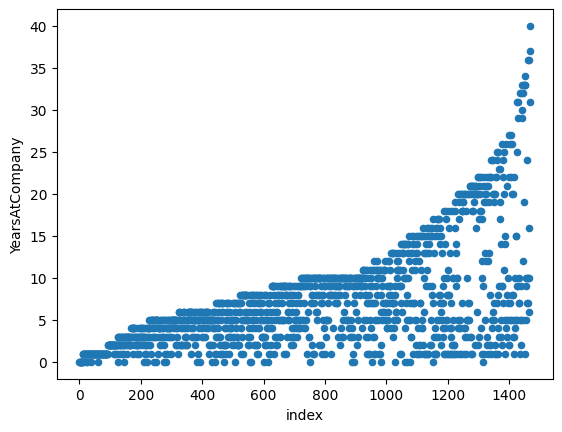

In [19]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

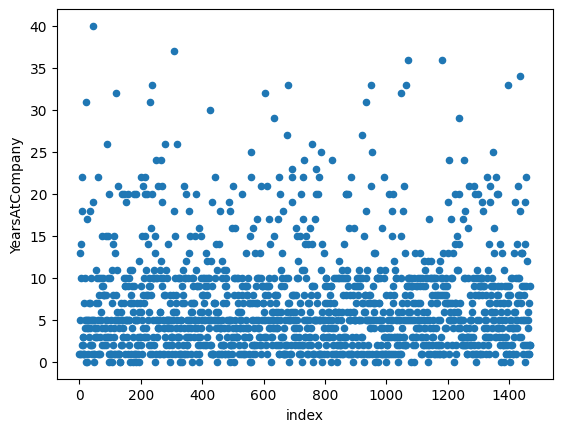

In [20]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

### Proportional stratified sampling

If you are interested in subgroups within the population, then you may
need to carefully control the counts of each subgroup within the
population. *Proportional stratified sampling* results in subgroup sizes
within the sample that are representative of the subgroup sizes within
the population. It is equivalent to performing a simple random sample on
each subgroup.

`attrition_pop` is available; `pandas` is loaded with its usual alias.

**Instructions**

- Get the proportion of employees by `Education` level from
  `attrition_pop`.
- Use proportional stratified sampling on `attrition_pop` to sample 40% of each `Education` group, setting the seed to `2022`.
- Get the proportion of employees by `Education` level from `attrition_strat`.


**Answer**


In [21]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop['Education'].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop)

Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64


In [22]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education')\
	.sample(frac=0.4, random_state=2022)

# Print the sample
print(attrition_strat)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   
...   ...        ...                ...        ...                   ...   
733    38        0.0  Travel_Frequently        653  Research_Development   
1061   44        0.0  Travel_Frequently        602       Human_Resources   
1307   41        0.0      Travel_Rarely       1276                 Sales   
1060   33        0.0      Travel_Rarely        516  Research_Development   
177    29        0.0      Travel_Rarely        738  Research_Development   

      DistanceFromHome      Education    EducationField  \
1191                 1  Belo

/tmp/ipykernel_4815/385919107.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_strat = attrition_pop.groupby('Education')\


In [23]:
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Education
Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: proportion, dtype: float64


### Equal counts stratified sampling

If one subgroup is larger than another subgroup in the population, but
you don't want to reflect that difference in your analysis, then you can
use *equal counts stratified sampling* to generate samples where each
subgroup has the same amount of data. For example, if you are analyzing
blood types, O is the most common blood type worldwide, but you may wish
to have equal amounts of O, A, B, and AB in your sample.

`attrition_pop` is available; `pandas` is loaded with its usual alias.

**Instructions**

- Use equal counts stratified sampling on `attrition_pop` to get 30
  employees from each `Education` group, setting the seed to `2022`.
- Get the proportion of employees by `Education` level from `attrition_eq`.

**Answer**


In [24]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education')\
	.sample(n=30, random_state=2022)

# Print the sample
print(attrition_eq)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   
...   ...        ...                ...        ...                   ...   
774    33        0.0      Travel_Rarely        922  Research_Development   
869    45        0.0      Travel_Rarely       1015  Research_Development   
530    32        0.0      Travel_Rarely        120  Research_Development   
1049   48        0.0      Travel_Rarely        163                 Sales   
350    29        1.0      Travel_Rarely        408  Research_Development   

      DistanceFromHome      Education    EducationField  \
1191                 1  Belo

/tmp/ipykernel_4815/38261059.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_eq = attrition_pop.groupby('Education')\


In [25]:
# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Education
Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: proportion, dtype: float64


### Weighted sampling

Stratified sampling provides rules about the probability of picking rows
from your dataset at the subgroup level. A generalization of this is
*weighted sampling*, which lets you specify rules about the probability
of picking rows at the row level. The probability of picking any given
row is proportional to the weight value for that row.

`attrition_pop` is available; `pandas`, `matplotlib.pyplot`, and `numpy`
are loaded with their usual aliases.

**Instructions**

- Plot `YearsAtCompany` from `attrition_pop` as a histogram with bins of
  width `1` from `0` to `40`.
- Sample 400 employees from `attrition_pop` weighted by `YearsAtCompany`.
- Plot `YearsAtCompany` from `attrition_weight` as a histogram with bins of width `1` from `0` to `40`.



**Answer**


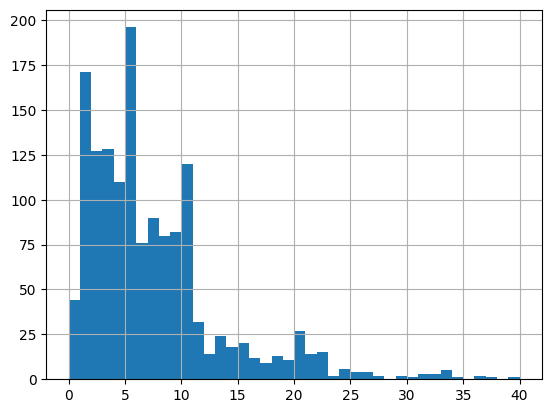

In [26]:
# Plot YearsAtCompany from attrition_pop as a histogram
attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

In [27]:
# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Print the sample
print(attrition_weight)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1269   45        0.0      Travel_Rarely       1385  Research_Development   
1422   53        0.0  Travel_Frequently        124                 Sales   
1283   39        1.0  Travel_Frequently        203  Research_Development   
1449   52        0.0      Travel_Rarely        699  Research_Development   
1225   41        0.0         Non-Travel        256                 Sales   
...   ...        ...                ...        ...                   ...   
617    32        1.0  Travel_Frequently        238  Research_Development   
137    22        0.0      Travel_Rarely        604  Research_Development   
475    33        0.0      Travel_Rarely       1075       Human_Resources   
1228   48        1.0  Travel_Frequently        708                 Sales   
285    28        0.0      Travel_Rarely        640  Research_Development   

      DistanceFromHome      Education    EducationField  \
1269                20      

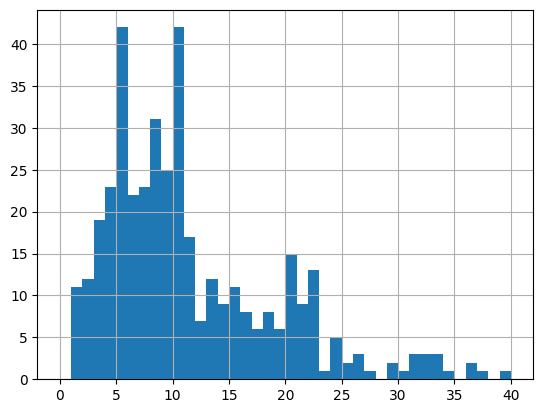

In [28]:
# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

### Performing cluster sampling

Now that you know when to use cluster sampling, it's time to put it into
action. In this exercise, you'll explore the `JobRole` column of the
attrition dataset. You can think of each job role as a subgroup of the
whole population of employees.

`attrition_pop` is available; `pandas` is loaded with its usual alias,
and the `random` package is available. A seed of `19790801` has also
been set with `random.seed()`.

**Instructions**

- Create a list of unique `JobRole` values from `attrition_pop`, and
  assign to `job_roles_pop`.
- Randomly sample four `JobRole` values from `job_roles_pop`.
- Subset `attrition_pop` for the sampled job roles by filtering for rows where `JobRole` is in `job_roles_samp`.
- Remove any unused categories from `JobRole`.
- For each job role in the filtered dataset, take a random sample of ten rows, setting the seed to `2022`.

**Answer**


In [29]:
# added/edited
import random

In [30]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Print the result
print(job_roles_samp)

['Sales_Executive', 'Sales_Representative', 'Healthcare_Representative', 'Manager']


In [31]:
# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]

# Print the result
print(attrition_filtered)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1      19        1.0      Travel_Rarely        528                 Sales   
3      18        0.0      Travel_Rarely        812                 Sales   
4      18        1.0  Travel_Frequently       1306                 Sales   
9      18        1.0  Travel_Frequently        544                 Sales   
23     19        1.0  Travel_Frequently        602                 Sales   
...   ...        ...                ...        ...                   ...   
1464   55        0.0      Travel_Rarely        452  Research_Development   
1465   55        0.0      Travel_Rarely       1117                 Sales   
1466   58        0.0         Non-Travel        350                 Sales   
1467   58        0.0      Travel_Rarely        682                 Sales   
1468   58        1.0      Travel_Rarely        147  Research_Development   

      DistanceFromHome      Education    EducationField  \
1                   22  Belo

In [32]:
# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby("JobRole")\
    .sample(n=10, random_state=2022)

# Print the sample
print(attrition_clust)         

      Age  Attrition     BusinessTravel  DailyRate            Department  \
812    31        0.0      Travel_Rarely        616  Research_Development   
1190   38        0.0      Travel_Rarely       1495  Research_Development   
378    33        0.0      Travel_Rarely       1069  Research_Development   
920    35        0.0  Travel_Frequently       1199  Research_Development   
917    33        0.0      Travel_Rarely        501  Research_Development   
1058   34        0.0      Travel_Rarely        404  Research_Development   
1264   46        0.0  Travel_Frequently        638  Research_Development   
1340   44        0.0      Travel_Rarely        477  Research_Development   
655    34        0.0      Travel_Rarely       1442  Research_Development   
896    42        0.0      Travel_Rarely       1128  Research_Development   
1106   51        0.0      Travel_Rarely        942  Research_Development   
1307   41        0.0      Travel_Rarely       1276                 Sales   
1359   43   

/tmp/ipykernel_4815/1642936327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()
/tmp/ipykernel_4815/1642936327.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_clust = attrition_filtered.groupby("JobRole")\


### 3 kinds of sampling

You're going to compare the performance of point estimates using simple,
stratified, and cluster sampling. Before doing that, you'll have to set
up the samples.

You'll use the `RelationshipSatisfaction` column of the `attrition_pop`
dataset, which categorizes the employee's relationship with the company.
It has four levels: `Low`, `Medium`, `High`, and `Very_High`. `pandas`
has been loaded with its usual alias, and the `random` package has been
loaded.

**Instructions**

- Perform simple random sampling on `attrition_pop` to get one-quarter
  of the population, setting the seed to `2022`.

<!-- -->

- Perform stratified sampling on `attrition_pop` to sample one-quarter
  of each `RelationshipSatisfaction` group, setting the seed to `2022`.

<!-- -->

- Create a list of unique values from `attrition_pop`'s
  `RelationshipSatisfaction` column.
- Randomly sample `satisfaction_unique` to get two values.
- Subset the population for rows where `RelationshipSatisfaction` is in
  `satisfaction_samp` and clear any unused categories from
  `RelationshipSatisfaction`; assign to `attrition_clust_prep`.
- Perform cluster sampling on the selected satisfaction groups, sampling
  one quarter of the *population* and setting the seed to `2022`.

**Answer**


In [33]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=0.25, random_state=2022)

In [34]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby("RelationshipSatisfaction")\
    .sample(frac=0.25, random_state=2022)

/tmp/ipykernel_4815/1183472179.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_strat = attrition_pop.groupby("RelationshipSatisfaction")\


In [42]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop['RelationshipSatisfaction'].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique, k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop['RelationshipSatisfaction'].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()

# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction")\
    .sample(n=len(attrition_pop) // 4, random_state=2022)


/tmp/ipykernel_4815/1225069142.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep['RelationshipSatisfaction'].cat.remove_unused_categories()
/tmp/ipykernel_4815/1225069142.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction")\


### Comparing point estimates

Now that you have three types of sample (simple, stratified, and
cluster), you can compare point estimates from each sample to the
population parameter. That is, you can calculate the same summary
statistic on each sample and see how it compares to the summary
statistic for the population.

Here, we'll look at how satisfaction with the company affects whether or
not the employee leaves the company. That is, you'll calculate the
proportion of employees who left the company (they have an `Attrition`
value of `1`) for each value of `RelationshipSatisfaction`.

`attrition_pop`, `attrition_srs`, `attrition_strat`, and
`attrition_clust` are available; `pandas` is loaded with its usual
alias.

**Instructions**

Group `attrition_pop` by `RelationshipSatisfaction` levels and calculate
the mean of `Attrition` for each level.

Calculate the proportion of employee attrition for each relationship
satisfaction group, this time on the simple random sample,
`attrition_srs`.

Calculate the proportion of employee attrition for each relationship
satisfaction group, this time on the stratified sample,
`attrition_strat`.

Calculate the proportion of employee attrition for each relationship
satisfaction group, this time on the cluster sample, `attrition_clust`.

**Answer**


In [43]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_pop)


# Calculate the same thing for the simple random sample 
mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_srs)


# Calculate the same thing for the stratified sample 
mean_attrition_strat = attrition_strat.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_strat)


# Calculate the same thing for the cluster sample 
mean_attrition_clust = attrition_clust.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64
RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64
RelationshipSatisfaction
Low          0.144928
Medium       0.078947
High         0.165217
Very_High    0.129630
Name: Attrition, dtype: float64
RelationshipSatisfaction
High         0.149864
Very_High    0.160763
Name: Attrition, dtype: float64


/tmp/ipykernel_4815/3036671708.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_attrition_pop = attrition_pop.groupby('RelationshipSatisfaction')['Attrition'].mean()
/tmp/ipykernel_4815/3036671708.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_attrition_srs = attrition_srs.groupby('RelationshipSatisfaction')['Attrition'].mean()
/tmp/ipykernel_4815/3036671708.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this war

## Sampling Distributions

### Calculating relative errors

The size of the sample you take affects how accurately the point
estimates reflect the corresponding population parameter. For example,
when you calculate a sample mean, you want it to be close to the
population mean. However, if your sample is too small, this might not be
the case.

The most common metric for assessing accuracy is *relative error*. This
is the absolute difference between the population parameter and the
point estimate, all divided by the population parameter. It is sometimes
expressed as a percentage.

`attrition_pop` and `mean_attrition_pop` (the mean of the `Attrition`
column of `attrition_pop`) are available; `pandas` is loaded as `pd`.

**Instructions**

- Generate a simple random sample from `attrition_pop` of fifty rows,
  setting the seed to `2022`.
- Calculate the mean employee `Attrition` in the sample.
- Calculate the relative error between `mean_attrition_srs50` and
  `mean_attrition_pop` as a *percentage*.

<!-- -->

- Calculate the *relative error percentage* again. This time, use a
  simple random sample of one hundred rows of `attrition_pop`.

**Answer**

In [44]:
# added/edited
mean_attrition_pop = attrition_pop['Attrition'].mean()

In [45]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(mean_attrition_pop - mean_attrition_srs50) / mean_attrition_pop

# Print rel_error_pct50
print(rel_error_pct50)


# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_pop - mean_attrition_srs100) / mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)


62.78481012658227
6.962025316455695


### Replicating samples

When you calculate a point estimate such as a sample mean, the value you
calculate depends on the rows that were included in the sample. That
means that there is some randomness in the answer. In order to quantify
the variation caused by this randomness, you can create many samples and
calculate the sample mean (or another statistic) for each sample.

`attrition_pop` is available; `pandas` and `matplotlib.pyplot` are
loaded with their usual aliases.

**Instructions**

- Replicate the provided code so that it runs `500` times. Assign the
  resulting list of sample means to `mean_attritions`.
- Draw a histogram of the `mean_attritions` list with 16 bins.

**Answer**


In [46]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)
  
# Print out the first few entries of the list
print(mean_attritions[0:5])

[0.21666666666666667, 0.2, 0.21666666666666667, 0.23333333333333334, 0.1]


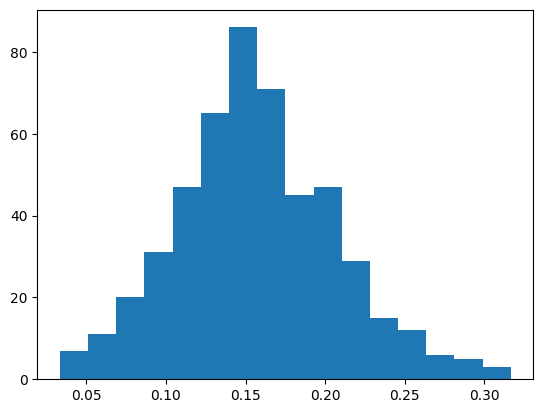

In [47]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)
plt.show()


### Exact sampling distribution

To quantify how the point estimate (sample statistic) you are interested
in varies, you need to know all the possible values it can take and how
often. That is, you need to know its distribution.

The distribution of a sample statistic is called the *sampling
distribution*. When we can calculate this exactly, rather than using an
approximation, it is known as the *exact sampling distribution*.

Let's take another look at the sampling distribution of dice rolls. This
time, we'll look at five eight-sided dice. (These have the numbers one
to eight.)

![8 sided
die](https://assets.datacamp.com/production/repositories/5975/datasets/001ee1102f4838b0806d9b3592ce76ce454c3892/shutterstock_231673213_8_sided_die.jpeg)

`pandas`, `numpy`, and `matplotlib.pyplot` are loaded with their usual
aliases. The `expand_grid()` function is also available, which expects a
dictionary of key-value pairs as its argument. The definition of the
`expand_grid()` function is provided in the [pandas
documentation](https://pandas.pydata.org/pandas-docs/version/0.17.1/cookbook.html#creating-example-data).

**Instructions**

- Expand a grid representing 5 8-sided dice. That is, create a DataFrame
  with five columns from a dictionary, named `die1` to `die5`. The rows
  should contain all possibilities for throwing five dice, each numbered
  `1` to `8`.
- Add a column, `mean_roll`, to `dice`, that contains the mean of the five rolls as a categorical.
- Create a bar plot of the `mean_roll` categorical column, so it displays the count of each `mean_roll` in increasing order from `1.0` to `8.0`.

**Answer**


In [48]:
# added/edited
import itertools
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

In [49]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Print the result
print(dice)

       die1  die2  die3  die4  die5
0         1     1     1     1     1
1         1     1     1     1     2
2         1     1     1     1     3
3         1     1     1     1     4
4         1     1     1     1     5
...     ...   ...   ...   ...   ...
32763     8     8     8     8     4
32764     8     8     8     8     5
32765     8     8     8     8     6
32766     8     8     8     8     7
32767     8     8     8     8     8

[32768 rows x 5 columns]


In [50]:
# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Print result
print(dice)

       die1  die2  die3  die4  die5 mean_roll
0         1     1     1     1     1       1.0
1         1     1     1     1     2       1.2
2         1     1     1     1     3       1.4
3         1     1     1     1     4       1.6
4         1     1     1     1     5       1.8
...     ...   ...   ...   ...   ...       ...
32763     8     8     8     8     4       7.2
32764     8     8     8     8     5       7.4
32765     8     8     8     8     6       7.6
32766     8     8     8     8     7       7.8
32767     8     8     8     8     8       8.0

[32768 rows x 6 columns]


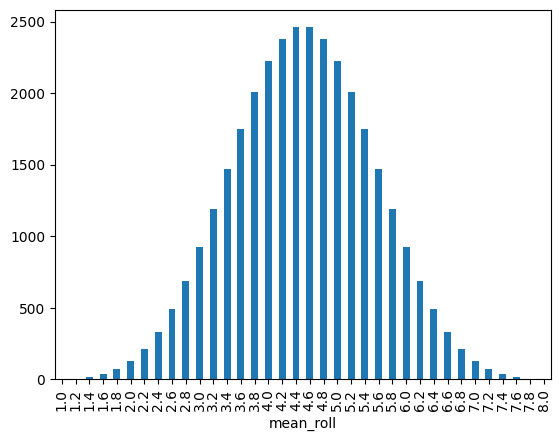

In [51]:
# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind="bar")
plt.show()

### Generating an approximate sampling distribution

Calculating the exact sampling distribution is only possible in very
simple situations. With just five eight-sided dice, the number of
possible rolls is `8**5`, which is over thirty thousand. When the
dataset is more complicated, for example, where a variable has hundreds
or thousands of categories, the number of possible outcomes becomes too
difficult to compute exactly.

In this situation, you can calculate an *approximate sampling
distribution* by simulating the exact sampling distribution. That is,
you can repeat a procedure over and over again to simulate both the
sampling process and the sample statistic calculation process.

`pandas`, `numpy`, and `matplotlib.pyplot` are loaded with their usual
aliases.

**Instructions**

- Sample one to eight, five times, with replacement. Assign to
  `five_rolls`.
- Calculate the mean of `five_rolls`.
- Replicate the sampling code 1000 times, assigning each result to the list `sample_means_1000`.
- Plot `sample_means_1000` as a histogram with `20` bins.

**Answer**


In [52]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1, 9)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())


# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Print the first 10 entries of the result
print(sample_means_1000[0:10])

4.8
[4.2, 5.8, 4.8, 5.2, 3.4, 3.0, 3.6, 5.6, 6.2, 5.6]


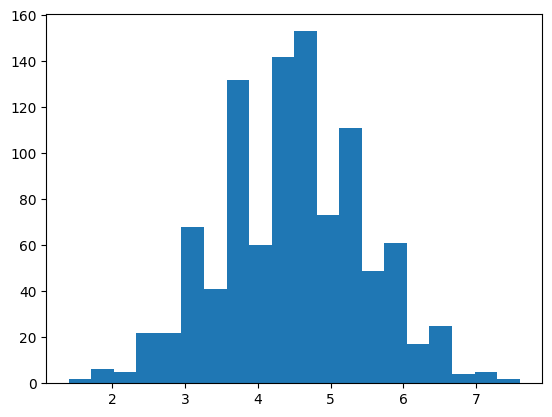

In [53]:
# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins=20)
plt.show()

### Population & sampling distribution means

One of the useful features of sampling distributions is that you can
quantify them. Specifically, you can calculate summary statistics on
them. Here, you'll look at the relationship between the mean of the
sampling distribution and the population parameter's mean.

Three sampling distributions are provided. For each, the employee
attrition dataset was sampled using simple random sampling, then the
mean attrition was calculated. This was done 1000 times to get a
sampling distribution of mean attritions. One sampling distribution used
a sample size of 5 for each replicate, one used 50, and one used 500.

`attrition_pop`, `sampling_distribution_5`, `sampling_distribution_50`,
and `sampling_distribution_500` are available; `numpy` as `np` is
loaded.

**Instructions**

- Calculate the mean of `sampling_distribution_5`,
  `sampling_distribution_50`, and `sampling_distribution_500` (a mean of
  sample means).

**Answer**


In [54]:
# added/edited
sampling_distribution_5 = [attrition_pop.sample(n=5)['Attrition'].mean() for _ in range(1000)]
sampling_distribution_50 = [attrition_pop.sample(n=50)['Attrition'].mean() for _ in range(1000)]
sampling_distribution_500 = [attrition_pop.sample(n=500)['Attrition'].mean() for _ in range(1000)]

In [55]:
# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)

# Print the results
print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)

0.1516
0.15776
0.161136


### Population & sampling distribution variation

You just calculated the mean of the sampling distribution and saw how it
is an estimate of the corresponding population parameter. Similarly, as
a result of the central limit theorem, the standard deviation of the
sampling distribution has an interesting relationship with the
population parameter's standard deviation and the sample size.

`attrition_pop`, `sampling_distribution_5`, `sampling_distribution_50`,
and `sampling_distribution_500` are available; `numpy` is loaded with
its usual alias.

**Instructions**

- Calculate the standard deviation of `sampling_distribution_5`,
  `sampling_distribution_50`, and `sampling_distribution_500` (a
  standard deviation of sample means).

**Answer**


In [56]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)

# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

0.15975907787341212
0.05167642453627043
0.012850316518850212


## Bootstrap Distributions

### Generating a bootstrap distribution

The process for generating a bootstrap distribution is similar to the
process for generating a sampling distribution; only the first step is
different.

To make a sampling distribution, you start with the population and
sample without replacement. To make a bootstrap distribution, you start
with a sample and sample that with replacement. After that, the steps
are the same: calculate the summary statistic that you are interested in
on that sample/resample, then replicate the process many times. In each
case, you can visualize the distribution with a histogram.

Here, `spotify_sample` is a subset of the `spotify_population` dataset.
To make it easier to see how resampling works, a row index column called
`'index'` has been added, and only the artist name, song name, and
`danceability` columns have been included.

`spotify_sample` is available; `pandas`, `numpy`, and
`matplotlib.pyplot` are loaded with their usual aliases.

**Instructions**

- Generate a single bootstrap resample from `spotify_sample`.
- Calculate the mean of the `danceability` column of `spotify_1_resample` using numpy.
- Replicate the expression provided 1000 times.
- Create a bootstrap distribution by drawing a histogram of `mean_danceability_1000`.

**Answer**

In [57]:
# added/edited
spotify_sample = spotify_population[['artists', 'name', 'danceability']]

In [58]:
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Print the resample
print(spotify_1_resample)

                         artists  \
36544            ['Neon Indian']   
11257            ['Chuck Wicks']   
32854        ['Chris Stapleton']   
16980  ['Brian Stokes Mitchell']   
22023          ['Blake Shelton']   
...                          ...   
32160                 ['Weezer']   
21041                    ['D12']   
5436    ['Thousand Foot Krutch']   
8847                 ['Haystak']   
15389             ['Los Cafres']   

                                                    name  danceability  
36544                                    Deadbeat Summer         0.635  
11257                                Stealing Cinderella         0.512  
32854                            When The Stars Come Out         0.471  
16980                   The Impossible Dream (The Quest)         0.386  
22023                                          Honey Bee         0.481  
...                                                  ...           ...  
32160  (If You're Wondering If I Want You To) I Want ...

In [59]:
# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5910867774150184


In [60]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
	mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
	)
  
# Print the result
print(mean_danceability_1000)

[0.5904832773189936, 0.5913621663145765, 0.5900986028423276, 0.5905381817745344, 0.5930551997311311, 0.5921350057614749, 0.5915282288265796, 0.5903228034376802, 0.5916797076051469, 0.5913512027078932, 0.5904753648934128, 0.5904020069137699, 0.5920672748223546, 0.5902138131361628, 0.5923683238909161, 0.5919732259458421, 0.5916186647781831, 0.5915103106395238, 0.5907257105819089, 0.5900108387747264, 0.5915321226233916, 0.5919121999231804, 0.5913817361244479, 0.591548492414058, 0.5906278351257922, 0.5916459429613982, 0.589737142308431, 0.592048677261379, 0.5910523165930479, 0.5904263635490685, 0.5913645933358939, 0.5914446754369119, 0.5900231299212599, 0.5903838006529671, 0.5907538601882081, 0.591140786441329, 0.5901308382946034, 0.5896519036873439, 0.5903136690992894, 0.5927458493374304, 0.589624599097369, 0.5911874663913962, 0.591475434511235, 0.5923185687536009, 0.591359131937776, 0.590478540906472, 0.592409364797388, 0.5902524870366813, 0.5912395165162282, 0.5907730939120415, 0.590728

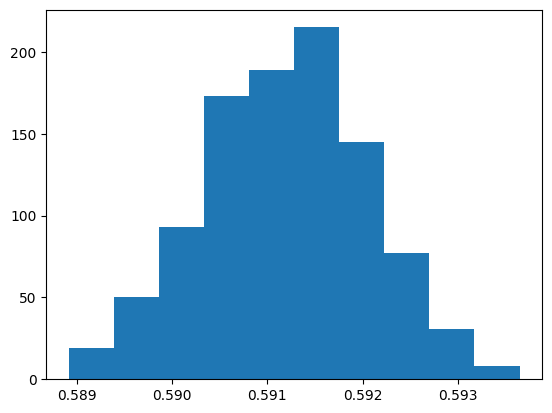

In [61]:
# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

### Sampling distribution vs. bootstrap distribution

The sampling distribution and bootstrap distribution are closely linked.
In situations where you can repeatedly sample from a population (these
occasions are rare), it's helpful to generate both the sampling
distribution and the bootstrap distribution, one after the other, to see
how they are related.

Here, the statistic you are interested in is the mean `popularity` score
of the songs.

`spotify_population` (the whole dataset) and `spotify_sample` (`500`
randomly sampled rows from `spotify_population`) are available; `pandas`
and `numpy` are loaded with their usual aliases.

**Instructions**

- Generate a sampling distribution of 2000 replicates.
- Sample 500 rows of the population without replacement and calculate
  the mean `popularity`.

<!-- -->

- Generate a bootstrap distribution of 2000 replicates.
- Sample 500 rows of the sample with replacement and calculate the mean
  `popularity`.

**Answer**


In [62]:
# added/edited
spotify_sample = spotify_population.sample(n=500)

In [63]:
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity     
    	spotify_population.sample(n=500)['popularity'].mean()
    )

# Print the sampling distribution results
print(mean_popularity_2000_samp)


mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for i in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity
    	spotify_sample.sample(n=500, replace=True)['popularity'].mean()
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot)


[55.046, 54.702, 54.438, 55.026, 54.644, 55.558, 55.514, 54.494, 55.908, 54.686, 55.028, 53.936, 55.326, 55.25, 55.378, 55.116, 53.982, 54.42, 55.18, 55.04, 55.012, 54.724, 54.278, 54.604, 54.682, 54.662, 54.292, 54.158, 55.424, 55.238, 53.84, 54.728, 54.082, 54.882, 54.986, 54.83, 55.302, 54.438, 54.082, 55.426, 55.048, 55.592, 54.828, 54.992, 54.286, 54.69, 54.368, 54.582, 55.284, 55.844, 56.126, 54.132, 55.458, 55.492, 54.436, 54.286, 54.764, 54.928, 54.504, 55.182, 54.682, 54.482, 55.6, 54.048, 54.52, 54.064, 54.844, 56.312, 54.424, 55.034, 55.134, 54.464, 55.62, 55.068, 55.212, 55.656, 54.432, 54.398, 54.38, 55.14, 55.022, 54.552, 55.526, 54.414, 54.54, 54.94, 55.11, 54.662, 55.276, 56.318, 55.124, 54.624, 54.55, 54.79, 55.266, 54.842, 55.292, 54.524, 54.224, 54.42, 55.522, 55.086, 55.474, 55.172, 54.778, 55.624, 53.984, 55.144, 54.682, 54.568, 55.542, 54.916, 54.642, 55.082, 54.722, 54.756, 55.114, 54.464, 53.98, 54.8, 54.392, 54.726, 55.188, 55.062, 54.816, 54.316, 53.87, 55.418

### Compare sampling and bootstrap means

To make calculation easier, distributions similar to those calculated
from the previous exercise have been included, this time using a sample
size of `5000`.

`spotify_population`, `spotify_sample`, `sampling_distribution`, and
`bootstrap_distribution` are available; `pandas` and `numpy` are loaded
with their usual aliases.

**Instructions**

Calculate the mean `popularity` in 4 ways:

- Population: from `spotify_population`, take the mean of `popularity`.
- Sample: from `spotify_sample`, take the mean of `popularity`.
- Sampling distribution: from `sampling_distribution`, take its mean.
- Bootstrap distribution: from `bootstrap_distribution`, take its mean.

**Answer**


In [64]:
# added/edited
sampling_distribution = [
    spotify_population.sample(n=500)['popularity'].mean()
    for _ in range(5000)
]
bootstrap_distribution = [
    spotify_sample.sample(n=500, replace=True)['popularity'].mean()
    for _ in range(5000)
]

In [65]:
# Calculate the population mean popularity
pop_mean = spotify_population['popularity'].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample['popularity'].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(sampling_distribution)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(bootstrap_distribution)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.896, 54.8391872, 54.8951956]


### Compare sampling and bootstrap standard deviations

In the same way that you looked at how the sampling distribution and
bootstrap distribution could be used to estimate the population mean,
you'll now take a look at how they can be used to estimate variation, or
more specifically, the standard deviation, in the population.

Recall that the sample size is `5000`.

`spotify_population`, `spotify_sample`, `sampling_distribution`, and
`bootstrap_distribution` are available; `pandas` and `numpy` are loaded
with their usual aliases.

**Instructions**

Calculate the standard deviation of `popularity` in 4 ways.

- Population: from `spotify_population`, take the standard deviation of
  `popularity`.
- Original sample: from `spotify_sample`, take the standard deviation of
  `popularity`.
- Sampling distribution: from `sampling_distribution`, take its standard
  deviation and multiply by the square root of the sample size (`5000`).
- Bootstrap distribution: from `bootstrap_distribution`, take its
  standard deviation and multiply by the square root of the sample size.

**Answer**


In [66]:
# added/edited
spotify_sample = spotify_population.sample(n=5000)
sampling_distribution = [
    spotify_population.sample(n=5000)['popularity'].mean()
    for _ in range(5000)
]
bootstrap_distribution = [
    spotify_sample.sample(n=5000, replace=True)['popularity'].mean()
    for _ in range(5000)
]

In [67]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std()

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(sampling_distribution, ddof=1) * np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(bootstrap_distribution, ddof=1) * np.sqrt(5000)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])


[10.880065274257536, 11.124775194341003, 10.065837217676954, 11.098028092809901]


### Calculating confidence intervals

You have learned about two methods for calculating confidence intervals:
the *quantile method* and the *standard error method*. The standard
error method involves using the inverse cumulative distribution function
(inverse CDF) of the normal distribution to calculate confidence
intervals. In this exercise, you'll perform these two methods on the
Spotify data.

`spotify_population`, `spotify_sample`, and `bootstrap_distribution` are
available; `pandas` and `numpy` are loaded with their usual aliases, and
`norm` has been loaded from `scipy.stats`.

**Instructions**

- Generate a 95% confidence interval using the quantile method on the
  bootstrap distribution, setting the `0.025` quantile as `lower_quant`
  and the `0.975` quantile as `upper_quant`.

Generate a 95% confidence interval using the standard error method from
the bootstrap distribution.

- Calculate `point_estimate` as the mean of `bootstrap_distribution`,
  and `standard_error` as the standard deviation of
  `bootstrap_distribution`.
- Calculate `lower_se` as the `0.025` quantile of an inv. CDF from a
  normal distribution with mean `point_estimate` and standard deviation
  `standard_error`.
- Calculate `upper_se` as the `0.975` quantile of that same inv. CDF.

**Answer**


In [ ]:
pip install scipy

In [69]:
# added/edited
from scipy.stats import norm

In [70]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution, 0.025)
upper_quant = np.quantile(bootstrap_distribution, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))


# Find the mean and std dev of the bootstrap distribution
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution, ddof=1)

# Find the lower limit of the confidence interval
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))


(54.329995, 54.942634999999996)
(54.321025328468686, 54.9362573115313)
